# Imports for plotting

In [33]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np, healpy as hp

# Download data

In [5]:
from selectionfunctions.config import config
config['data_dir'] = '/path/to/big/data/folder/'

In [6]:
import selectionfunctions.cog_ii
selectionfunctions.cog_ii.fetch()

Checking existing file to see if MD5 sum matches ...
File exists. Not overwriting.
Checking existing file to see if MD5 sum matches ...
File exists. Not overwriting.


# Simple query

In [7]:
import selectionfunctions.cog_ii as CoGII
from selectionfunctions.source import Source

In [8]:
dr3_sf = CoGII.dr3_sf(version='modelAB',crowding=True)

Loading auxilliary data ...
Loading selection function ...
Creating selection function interpolator...
t = 19.421 s
  auxilliary:  19.413 s
          sf:   0.005 s
interpolator:   0.003 s
Loading auxilliary data ...


In [9]:
coords = Source('12h30m25.3s', '15d15m58.1s', frame='icrs', photometry={'gaia_g':21.2})

prob_selection = dr3_sf(coords)

print('Probability of selection = {:.3f}%'.format(prob_selection*100.0))

Probability of selection = 40.623%


# Querying arrays of coordinates

In [10]:
l = np.array([0., 90., 180.])
b = np.array([15., 0., -15.])
g = np.array([20.8,21.0,21.2])

coords = Source(l, b, unit='deg', frame='galactic', photometry={'gaia_g':g})

prob_selection = dr3_sf(coords)

print(prob_selection)

[0.99994335 0.9893388  0.80941942]


In [11]:
l = np.linspace(0., 180., 12)
b = np.zeros(12)
g = 21.0*np.ones(12)
l.shape = (3, 4)
b.shape = (3, 4)
g.shape = (3, 4)

coords = Source(l, b, unit='deg', frame='galactic', photometry={'gaia_g':g})

prob_selection = dr3_sf(coords)

print(prob_selection)

[[0.98947815 0.82287275 0.79800773 0.95995603]
 [0.99167424 0.998672   0.99035466 0.99062192]
 [0.99991956 0.98991654 0.98819292 0.98139749]]


# Maps

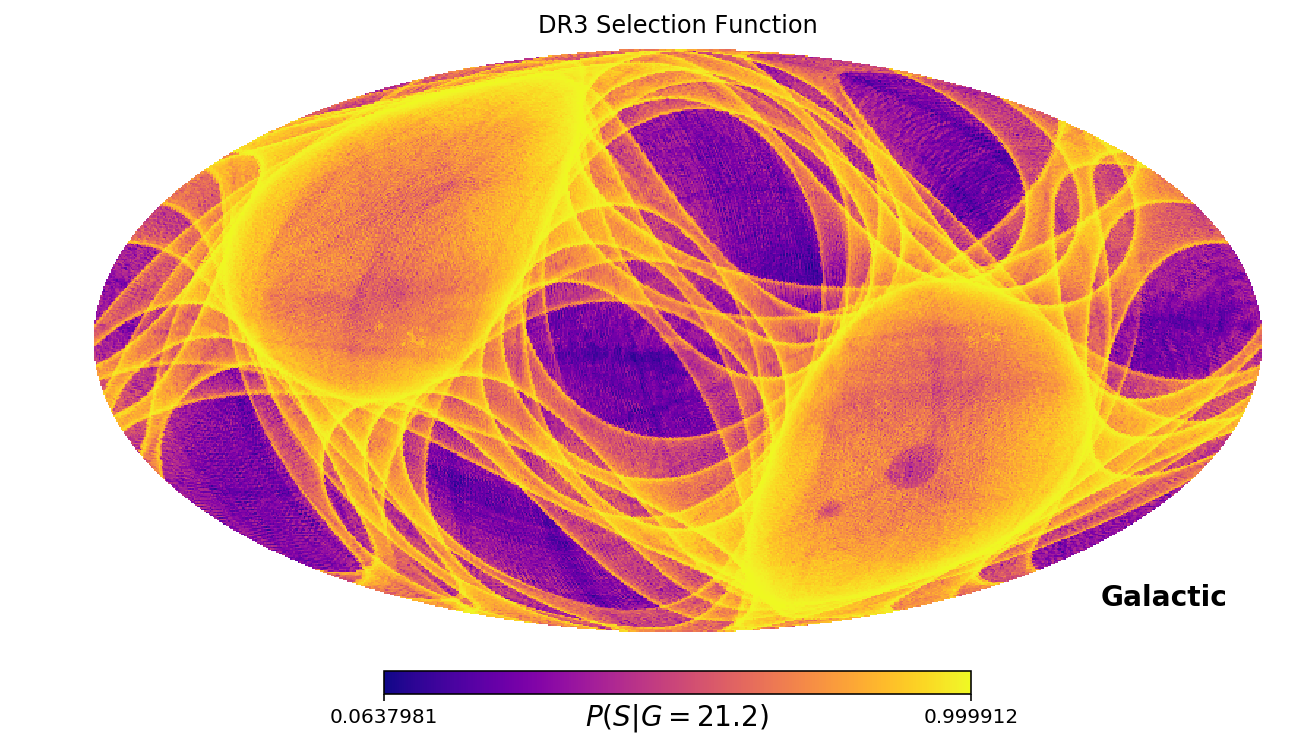

In [29]:
import astropy.units as units

nside=128
ra, dec = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)), nest=True, lonlat=True)
g = 21.2*np.ones(ra.shape)
coords = Source(ra, dec, unit='deg', frame='icrs', photometry={'gaia_g':g})

prob_selection = dr3_sf(coords)

hp.mollview(prob_selection, nest=True, title='DR3 Selection Function', unit=r'$P(S | G=%.1f)$' % g[0], 
            cmap='plasma', coord=['C','G'])

In [30]:
dr2_sf = CoGII.dr2_sf(version='modelAB',crowding=True)

Loading auxilliary data ...
Loading selection function ...
Creating selection function interpolator...
t = 16.675 s
  auxilliary:  16.666 s
          sf:   0.002 s
interpolator:   0.007 s


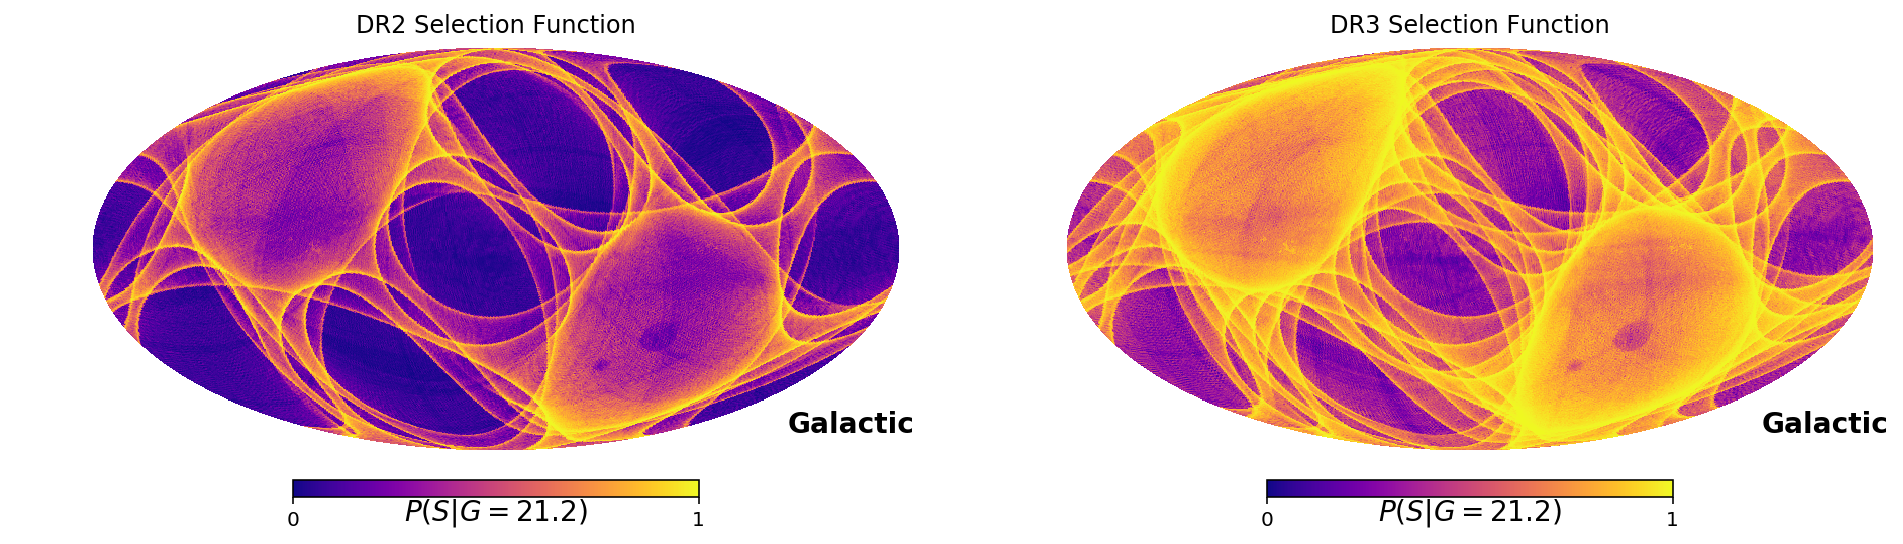

In [32]:
import astropy.units as units

nside=128
ra, dec = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)), nest=True, lonlat=True)
g = 21.2*np.ones(ra.shape)
coords = Source(ra, dec, unit='deg', frame='icrs', photometry={'gaia_g':g})



fig, axes=plt.subplots(1,2,figsize=(16,5))

plt.sca(axes[0])
prob_selection = dr2_sf(coords)
hp.mollview(prob_selection, nest=True, title='DR2 Selection Function', unit=r'$P(S | G=%.1f)$' % g[0], 
            cmap='plasma', coord=['C','G'], min=0, max=1, hold=True)


plt.sca(axes[1])
prob_selection = dr3_sf(coords)
hp.mollview(prob_selection, nest=True, title='DR3 Selection Function', unit=r'$P(S | G=%.1f)$' % g[0], 
            cmap='plasma', coord=['C','G'], min=0, max=1, hold=True)


plt.savefig('map_dr2-vs-dr3.png', 
            bbox_inches='tight', dpi=200)